
## Objectives of this notebook
* <span style='font-family:serif'> <font size="4"> Demonstrate a typical workflow for a user of <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'>.
* <span style='font-family:serif'> <font size="4"> Inspect a remote dataset hosted by an <span style='color:#FF3333'> **OPeNDAP**<span style='color:black'> server.




<span style='color:#009999'> <span style='font-family:serif'> <font size="15"> **Palmer Drought Severity Index (PDSI)**

<span style='font-family:serif'> <font size="3.5"> (sources: [NCAR Climate Data Guide](https://climatedataguide.ucar.edu/climate-data/palmer-drought-severity-index-pdsi); [Climate Prediction Center at NOAA](https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/cdus/palmer_drought/wpdanote.shtml))


<span style='font-family:serif'> <font size="4"> The Palmer Drought Severity Index (<span style='color:#CC0000'>PDSI<span style='color:black'>) uses readily available temperature and precipitation data to estimate relative dryness. The <span style='color:#CC0000'>PDSI<span style='color:black'> indicates the prolonged and abnormal moisture deficiency or excess. The <span style='color:#CC0000'>PDSI<span style='color:black'>  is an important climatoligical tool for evaluating the scope, severity, and frequency of prolonged periods of abnormally dry or wet weather. It can be used to help delineate disaster areas and indicate the availability of irrigation water supplies, reservior levels, range conditions, amount of stock water, and potential intensity of forest fires.

* <span style='font-family:serif'> <font size="4"> The <span style='color:#CC0000'>PDSI<span style='color:black'> has been reasonably effective in determining long-term drought, especially over low and middle latitudes
* <span style='font-family:serif'> <font size="4"> <span style='color:#CC0000'>PDSI<span style='color:black'> takes into account the basic effect of global warming through potential evapotranspiration.
* <span style='font-family:serif'> <font size="4"> Takes precedent (prior month) conditions into account
* <span style='font-family:serif'> <font size="4"> Monthly <span style='color:#CC0000'>PDSI<span style='color:black'> values do not capture droughts on time scales less than about 12 months.

<span style='font-family:serif'> <font size="4"> However,

* <span style='font-family:serif'> <font size="4"> Not as comparable across regions as the Standardized Precipitation Index (SPI), but this can be alleviated by using the self-calibrating <span style='color:#CC0000'>PDSI<span style='color:black'>.
* <span style='font-family:serif'> <font size="4"> Lacks multi-timescale features of indices like the SPI, making it difficult to correlate with specific water resources like runoff, snowpack, resevoir storage, etc.
* <span style='font-family:serif'> <font size="4"> Does not account for snow or ice (delayed runoff); assumes precipitation is immediately available




.

<span style='font-family:serif'> <font size="6.5"> <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'> **url**
 
<span style='font-family:serif'> <font size="4.5"> At the core of <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'>'s implementation, is the concept that a <span style='color:blue'><ins>**url equals a dataset**</ins>. <span style='color:black'>

<span style='font-family:serif'> <font size="4.5"> Datasets that can be accesed by <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'> are rich in metadata in the sense that they are self-describing. The metadata follows common CF-conventions well established in the geosciences (although in principle CF-convections are discipline neutral). This is important for reproducibility and Open Science, as anybody accessing the data should be able to make sense of the data and reproduce the broad scientific workflow. 

<span style='font-family:serif'> <font size="4.5"> A <ins>url</ins> that gives direct access to a dataset can be inspected in html format, by appending an `html` to the url. In this case the url that gives direct access to the data is:




```bash
dataaccess_url  = "http://thredds.northwestknowledge.net/thredds/dodsC/agg_met_pdsi_1979_CurrentYear_CONUS.nc"
```


<span style='font-family:serif'> <font size="4.5"> The metadata (variables names, coordinates, annotated history regarding the preprocessing of the data, reports/publications, quality checks, etc) associated with this dataset can be inspected at this [<ins>clickable_url hyperlink</ins>](http://thredds.northwestknowledge.net/thredds/dodsC/agg_met_pdsi_1979_CurrentYear_CONUS.nc.html), defined as follows:



```python
clickable_html_url = "http://thredds.northwestknowledge.net/thredds/dodsC/agg_met_pdsi_1979_CurrentYear_CONUS.nc.html"
```



.

<span style='font-family:serif'> <font size="6.5"> <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'> clients 

<span style='font-family:serif'> <font size="4.5">  A **client** in this context is simply an application or software typically used for the manipulation of scientific data, an important component of the user workflow. The client may be installed on a computer local to a user like a personal computer, or on a remote High Performance Compute (HPC) environment.  **<ins>NOTE</ins>**: No matter the choice of client, <span style='color:#FF3333'> **OPeNDAP** <span style='color:black'> is working behing the scenes on the server side to ensure <ins> fast, efficient, and free data retrieval</ins>.

# <ins>xarray as client</ins>
<span style='font-family:serif'> <font size="4.5"> We make use of [xarray](https://docs.xarray.dev/en/stable/) given its extensive metadata manipulation capabilities, integrability with other libraries/packages, and easy syntax. We note however that [pydap](https://pydap.github.io/pydap/) is a <ins>backend</ins> used internally by `xarray` to <ins>access remote OPeNDAP-served data via urls</ins>. We will also show how to used `pydap` directly at the end of the tutorial.




<span style='font-family:serif'> <font size="7.5"><span style='color:#0066CC'><ins>Workflow Begins</ins><span style='color:black'>


<span style='font-family:serif'> <font size="4.5"> To navigate through this notebook, create and activate the conda environment with the necessary dependencies. This assumes the user has mamba installed in their computing environment.
```python
$ mamba create -n opendap_tutorials -c conda-forge python=3.10 matplotlib pydap xarray cartopy jupyterlab
$ mamba activate opendap_tutorials
```

<span style='font-family:serif'> <font size="4.5"> The first line makes sure that all required packages are installed, while the second activates such environment so that any subsequent manipulation makes use of those packages. 


In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# clients
import xarray as xr
from pydap.client import open_url

In [2]:
# define url
palmer_url = "http://thredds.northwestknowledge.net/thredds/dodsC/agg_met_pdsi_1979_CurrentYear_CONUS.nc"

In [3]:
# use xarray
ds = xr.open_dataset(palmer_url, engine='pydap')
ds

<xarray.Dataset> Size: 21GB
Dimensions:                                   (lat: 585, crs: 1, lon: 1386,
                                               day: 3228)
Coordinates:
  * lat                                       (lat) float64 5kB 49.4 ... 25.07
  * crs                                       (crs) float32 4B 3.0
  * lon                                       (lon) float64 11kB -124.8 ... -...
  * day                                       (day) datetime64[ns] 26kB 1980-...
Data variables:
    daily_mean_palmer_drought_severity_index  (day, lat, lon) float32 10GB ...
    category                                  (day, lat, lon) float32 10GB ...
Attributes: (12/20)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    note1:                      The projection information for this file is: ...
    baseperiod:                 1980-2019 base period.
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [4]:
ds.data_vars

Data variables:
    daily_mean_palmer_drought_severity_index  (day, lat, lon) float32 10GB ...
    category                                  (day, lat, lon) float32 10GB ...

In [5]:
var = 'daily_mean_palmer_drought_severity_index'

In [6]:
ds[var].shape

(3228, 585, 1386)

In [7]:
ds[var].nbytes / 1e9

10.46917872

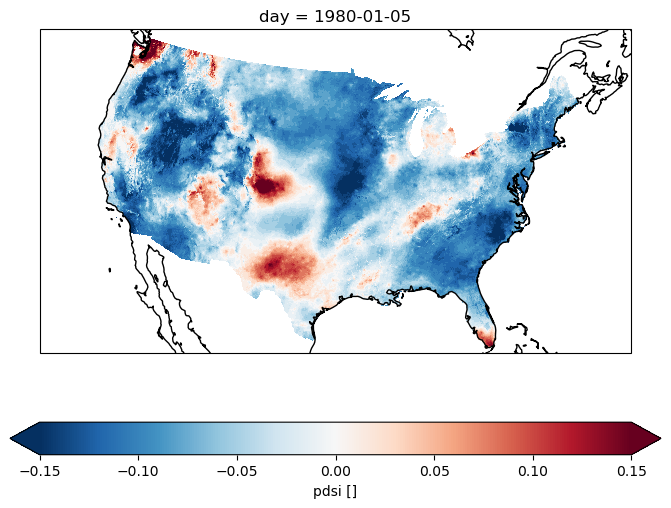

CPU times: user 793 ms, sys: 91.8 ms, total: 885 ms
Wall time: 13.1 s


In [8]:
%%time
fig, axis = plt.subplots(figsize=(12, 6), subplot_kw=dict(projection=ccrs.Orthographic(-90, 30)))
ds[var].isel(day=0).plot(ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True)
axis.coastlines() 
plt.show()

<span style='font-family:serif'> <font size="4.5"> `xarray` delays the computation until the last second, allowing for arithmetic operations to continute through. It only loads data until plotting a variable, or until using the `compute()` method.

<span style='font-family:serif'> <font size="7.5"> using pydap directly 

<span style='font-family:serif'> <font size="4.5"> `xarray` explicitly uses `pydap.client.open_url` .

In [9]:
%%time 
draught_ds = open_url(palmer_url) # lazy view of remote dataset

CPU times: user 19.7 ms, sys: 3.64 ms, total: 23.3 ms
Wall time: 486 ms


In [10]:
print([key for key in draught_ds.keys()])

['lat', 'crs', 'lon', 'daily_mean_palmer_drought_severity_index', 'day', 'category']


In [11]:
# metadata about the project / dataset
draught_ds.attributes

{'NC_GLOBAL': {'geospatial_bounds_crs': 'EPSG:4326',
  'Conventions': 'CF-1.0',
  'geospatial_bounds': 'POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))',
  'geospatial_lat_min': '25.066666666666666',
  'geospatial_lat_max': '49.40000000000000',
  'geospatial_lon_min': '-124.7666666333333',
  'geospatial_lon_max': '-67.058333300000015',
  'geospatial_lon_resolution': '0.041666666666666',
  'geospatial_lat_resolution': '0.041666666666666',
  'geospatial_lat_units': 'decimal_degrees north',
  'geospatial_lon_units': 'decimal_degrees east',
  'coordinate_system': 'EPSG:4326',
  'author': 'John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu',
  'date': '24 March 2024',
  'note1': 'The projection information for this file is: GCS WGS 1984.',
  'baseperiod': '1980-2019 base period.',
  'note2': 'Citation: Abatzoglou, J.T., 201

<span style='font-family:serif'> <font size="6.5"> accessing the main variable

In [12]:
draught_data = draught_ds[var]

In [13]:
# attributes / metadata for specific variable
draught_data.attributes

{'_FillValue': 32767,
 'units': '',
 'description': 'Palmer Drought Severity Index',
 'long_name': 'pdsi',
 'standard_name': 'pdsi',
 'missing_value': 32767,
 'dimensions': 'lon lat time',
 'grid_mapping': 'crs',
 'coordinate_system': 'WGS84,EPSG:4326',
 'scale_factor': 0.01,
 'add_offset': -15.0,
 'coordinates': 'lat lon day',
 '_Unsigned': 'true',
 '_ChunkSizes': [294, 49, 126]}

In [14]:
draught_data.shape

(3228, 585, 1386)

In [15]:
[key for key in draught_data.keys()]

['daily_mean_palmer_drought_severity_index', 'day', 'lat', 'lon']

In [16]:
def decode(_DATA, attrs):
    """
    Decoding function - pydap only accesses data. 
    data has missing values, masks, units are not standard, and
    offset - all to increase the number of significant digits 
    without changing the data type / increasing memory usage.
    """
    # default values
    Mask = 1
    scale = 1
    offset = 0

    _Fill_value = attrs['_FillValue']
    scale_factor = attrs['scale_factor']
    add_offset = attrs['add_offset']
    
    if scale_factor is not None:
        scale = scale_factor
    if add_offset is not None:
        offset = add_offset
    if _Fill_value is not None:
        mask = _DATA.ravel() < _Fill_value
        nmask = mask.reshape(np.shape(_DATA))
        Mask = np.reshape(np.where(nmask.ravel()==0, np.nan, nmask.ravel()), np.shape(nmask))

    return Mask, offset, scale

<span style='font-family:serif'> <font size="5.5"> Data has yet to be downloaded. We have performed <ins><span style='color:#0080FF'>**lazy**<span style='color:black'></ins> inspection of the data. However, data has to be downloaded and loaded into memory (RAM) in order to be <ins>preprocessed</ins>.


## Download some data into memory

In [17]:
%%time
DATA = np.squeeze(draught_data[var][0, :, :].data) # note the data method to extract the numpy array

CPU times: user 33 ms, sys: 36.9 ms, total: 69.9 ms
Wall time: 12.5 s


In [18]:
type(DATA), DATA.shape

(numpy.ndarray, (585, 1386))

## extract decoding variables from metadata



In [19]:
%%time
mask, offset, scale = decode(DATA, draught_data.attributes)

CPU times: user 3.92 ms, sys: 2.27 ms, total: 6.19 ms
Wall time: 5.01 ms


## extract coordinate system

In [20]:
%%time
lats = draught_ds['lat'][:].data
lons = draught_ds['lon'][:].data
time = draught_ds['day'][:].data

CPU times: user 18.3 ms, sys: 5.32 ms, total: 23.6 ms
Wall time: 756 ms


In [21]:
Lons, Lats = np.meshgrid(lons, lats)

# time is not decoded.

In [22]:
time

array([29223., 29228., 29233., ..., 45359., 45364., 45369.], dtype='>f8')

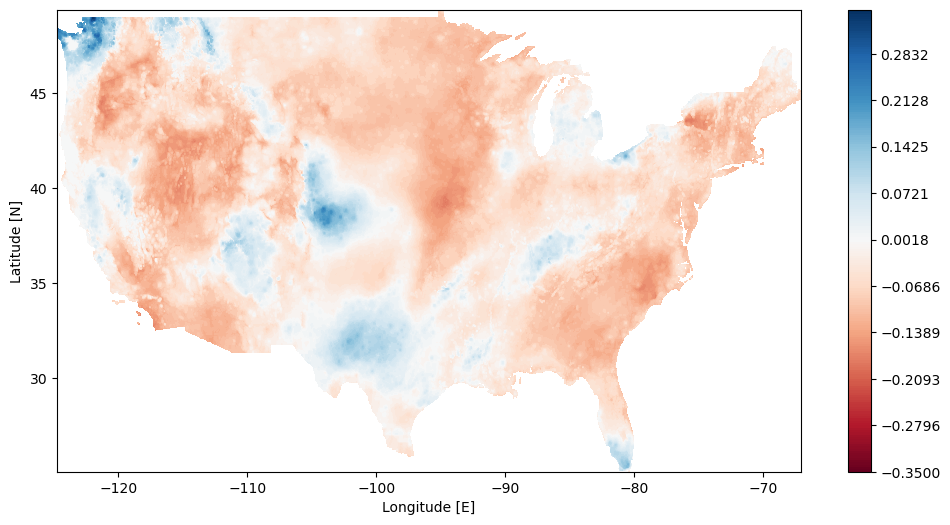

CPU times: user 1.22 s, sys: 28.3 ms, total: 1.25 s
Wall time: 1.28 s


In [23]:
%%time
plt.subplots(figsize=(12, 6))
plt.contourf(Lons, Lats, offset + DATA*mask*scale, levels=np.linspace(-0.35, 0.35, 200), cmap='RdBu')
plt.colorbar()
plt.xlabel('Longitude [E]'); plt.ylabel('Latitude [N]')
plt.show()